In [5]:
import pandas as pd 
from scipy.sparse import csr_matrix
from fuzzywuzzy import process

c:\Users\Pontus\Codes\Github\AI-Pontus-Berglund-OPA23-\venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [61]:
movies = "../data/ml-latest/movies.csv"


df_movies = pd.read_csv(movies, usecols = ["movieId", "title"], dtype={"movieId":"int32", "title":"str"})
df_movies.head()


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [16]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [7]:
ratings = "../data/ml-latest/ratings.csv"
df_ratings = pd.read_csv(ratings, usecols = ["userId", "movieId", "rating"], dtype={"userId":"int32", "movieId":"int32",  "rating":"float32"})
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [ ]:
import matplotlib.pyplot as plt

df_movies['year'] = pd.to_numeric(df_movies['year'], errors='coerce').fillna(0).astype(int)

# Skapa kolumnen "decade" genom att dela upp årtalen i grupper om 10 år
df_movies['decade'] = pd.cut(df_movies['year'], bins=range(df_movies['year'].min(), df_movies['year'].max() + 11, 10), right=False)

# Räkna antalet filmer per 10 år
titles_per_decade = df_movies.groupby('decade')['title'].count()

# Plotta histogrammet
plt.figure(figsize=(12, 6))
plt.bar(titles_per_decade.index.astype(str), titles_per_decade.values, color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.title('Number of Movie Titles Released Every 10 Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
count_movie_rating = df_ratings.groupby("movieId")["rating"].count()

sort_count_list = count_movie_rating.sort_values(ascending= False)

top_10 = sort_count_list.head(10)

top_10 = top_10.reset_index()

top_10 = top_10.rename(columns={"rating": "rating_count"})
top_10_with_titles = top_10.merge(df_movies[["movieId", "title"]], on="movieId")



print(top_10_with_titles)

   movieId  rating_count                                              title
0      318        122296                   Shawshank Redemption, The (1994)
1      356        113581                                Forrest Gump (1994)
2      296        108756                                Pulp Fiction (1994)
3     2571        107056                                 Matrix, The (1999)
4      593        101802                   Silence of the Lambs, The (1991)
5      260         97202          Star Wars: Episode IV - A New Hope (1977)
6     2959         86207                                  Fight Club (1999)
7      527         84232                            Schindler's List (1993)
8      480         83026                               Jurassic Park (1993)
9     1196         80200  Star Wars: Episode V - The Empire Strikes Back...


In [90]:
total_rating = df_ratings["movieId"].value_counts()
top_10_with_titles = total_rating.head(10)

top_10_movies_data = df_ratings[df_ratings["movieId"].isin(top_10_with_titles.index)]

top_10_movies_data_average = top_10_movies_data.groupby("movieId")["rating"].mean().reset_index()

top_10_movies_data_average_titles = top_10_movies_data_average.merge(df_movies[["movieId", "title"]], on="movieId")

top_10_movies_data_average_titles_sorted = top_10_movies_data_average_titles.sort_values(by='rating', ascending=False)

print(top_10_movies_data_average_titles_sorted)


   movieId    rating                                              title
2      318  4.416792                   Shawshank Redemption, The (1994)
5      527  4.242337                            Schindler's List (1993)
9     2959  4.236019                                  Fight Club (1999)
1      296  4.191778                                Pulp Fiction (1994)
8     2571  4.160631                                 Matrix, The (1999)
6      593  4.150287                   Silence of the Lambs, The (1991)
7     1196  4.118030  Star Wars: Episode V - The Empire Strikes Back...
0      260  4.092401          Star Wars: Episode IV - A New Hope (1977)
3      356  4.068189                                Forrest Gump (1994)
4      480  3.689013                               Jurassic Park (1993)


In [65]:
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)$')
df_movies


,movieId,title,year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),2021
86533,288971,Ouija Japan (2021),2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),1973
86535,288977,Skinford: Death Sentence (2023),2023


C:\Users\Pontus\AppData\Local\Temp\ipykernel_8492\1643490052.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_per_decade = df_decades.groupby('decade')['title'].count()


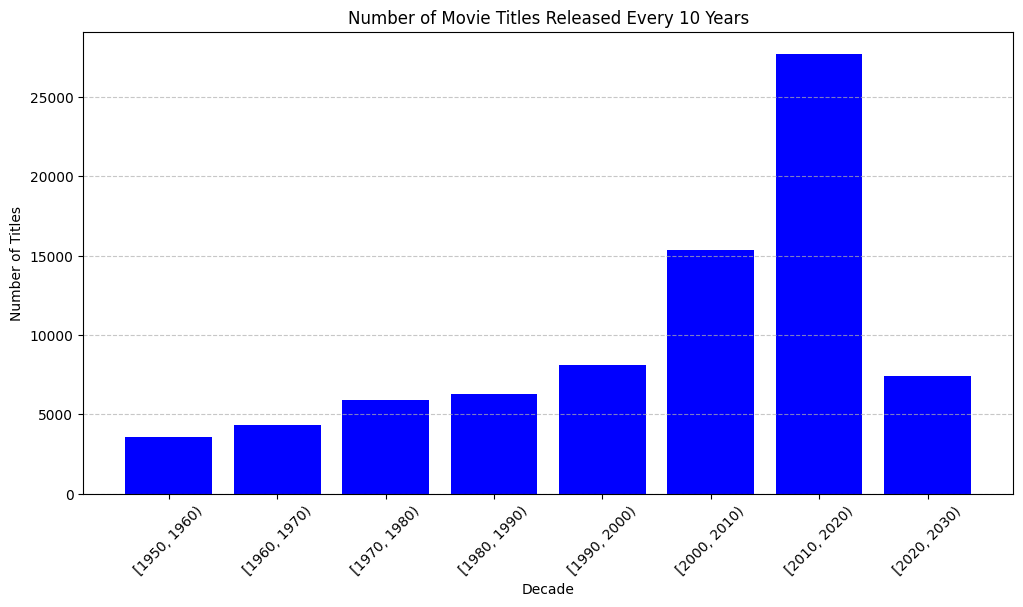

In [75]:
import matplotlib.pyplot as plt

# Help from chatgpt cause it changed the df_movies at first
df_decades = df_movies.copy()


if 'year' in df_decades.columns:
    
    df_decades['year'] = pd.to_numeric(df_decades['year'], errors='coerce').fillna(0).astype(int)

    
    start_decade = 1950
    df_decades['decade'] = pd.cut(df_decades['year'], bins=range(start_decade, df_decades['year'].max() + 11, 10), right=False)

    
    titles_per_decade = df_decades.groupby('decade')['title'].count()

    
    plt.figure(figsize=(12, 6))
    plt.bar(titles_per_decade.index.astype(str), titles_per_decade.values, color='blue')
    plt.xlabel('Decade')
    plt.ylabel('Number of Titles')
    plt.title('Number of Movie Titles Released Every 10 Years')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'year' not found in DataFrame.")

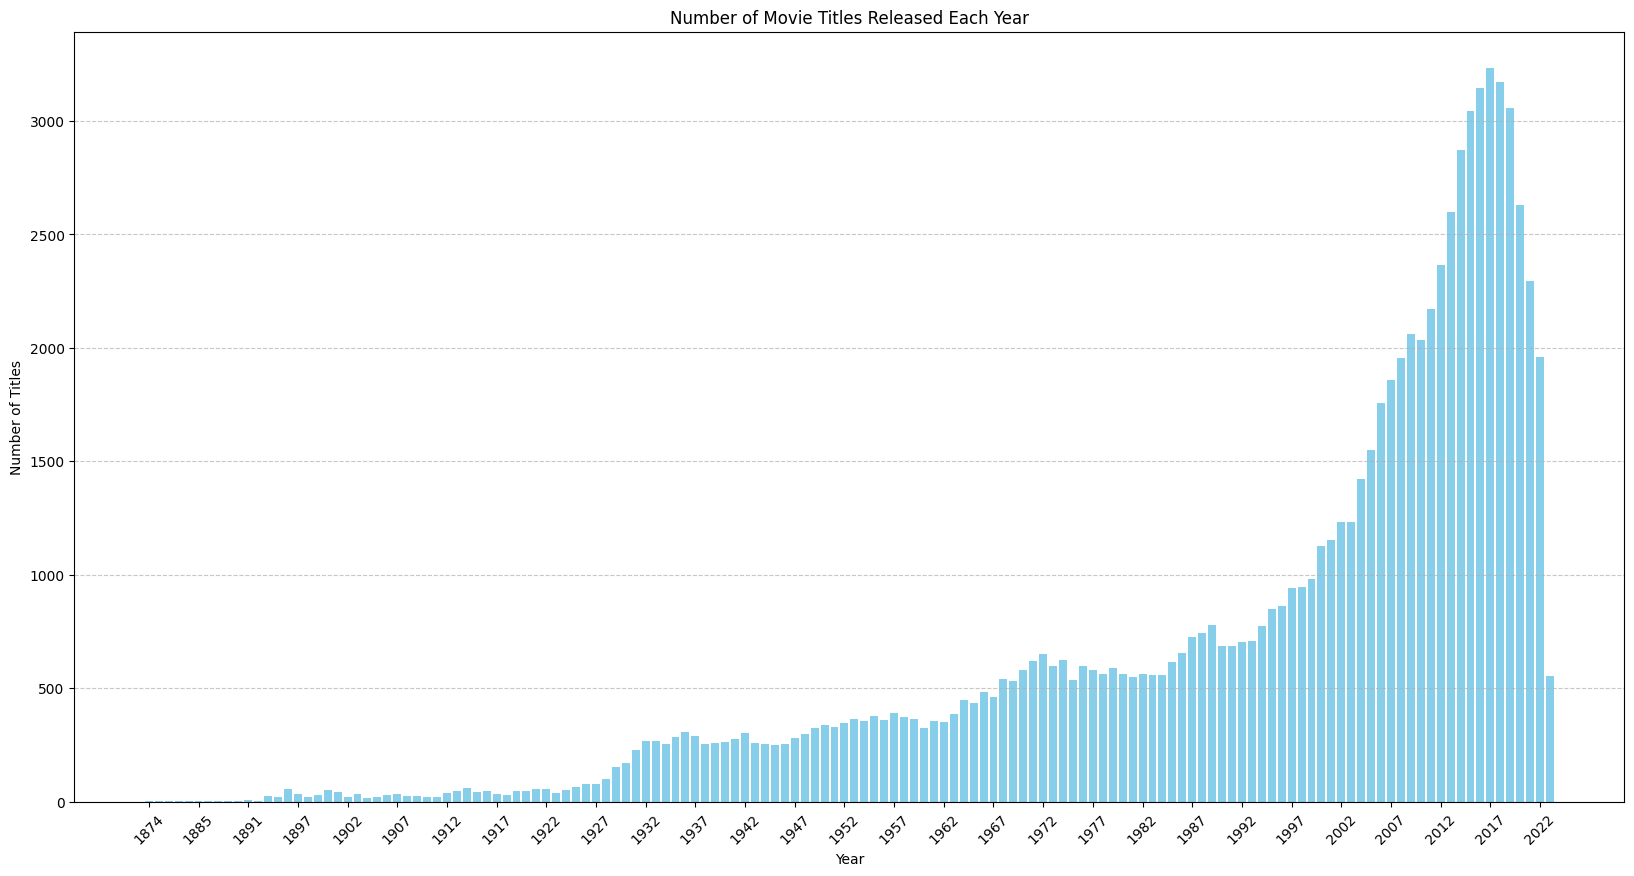

In [76]:
import matplotlib.pyplot as plt

# Group by 'year' and count the number of titles for each year
titles_per_year = df_movies.groupby('year')['title'].count()

plt.figure(figsize=(20, 10))
plt.bar(titles_per_year.index, titles_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movie Titles Released Each Year')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(titles_per_year.index[::5], rotation=45)

plt.show()

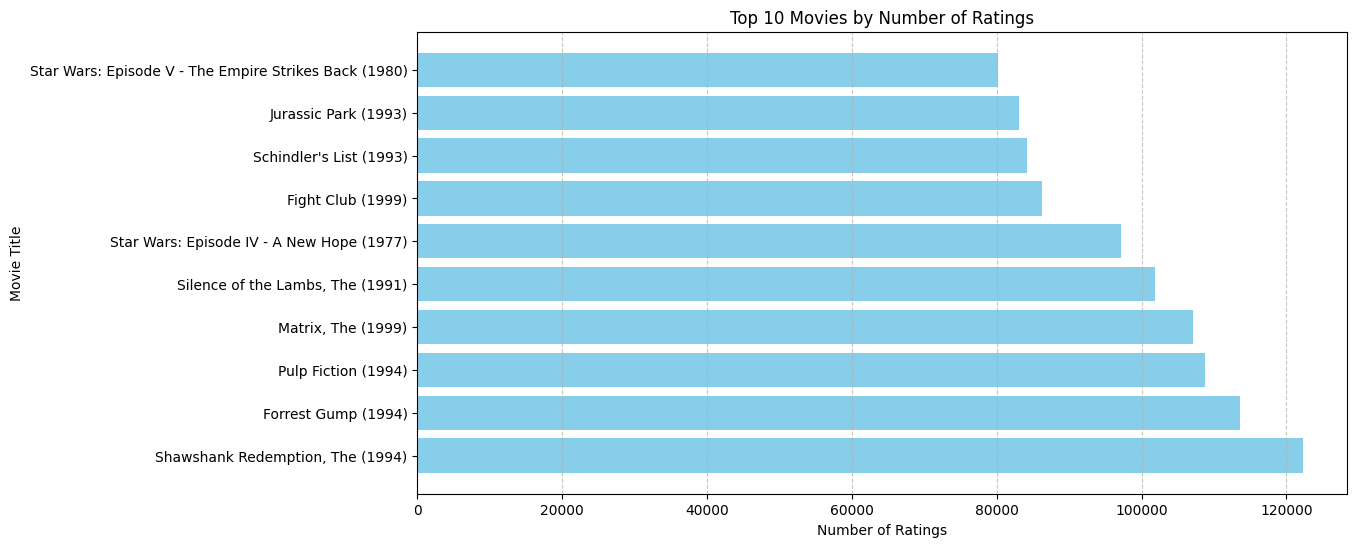

In [85]:

plt.figure(figsize=(12, 6))
# Chatgpt gave idea with horisontel diagram and showed how
plt.barh(top_10_with_titles["title"], top_10_with_titles["rating_count"], color="skyblue")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Number of Ratings")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

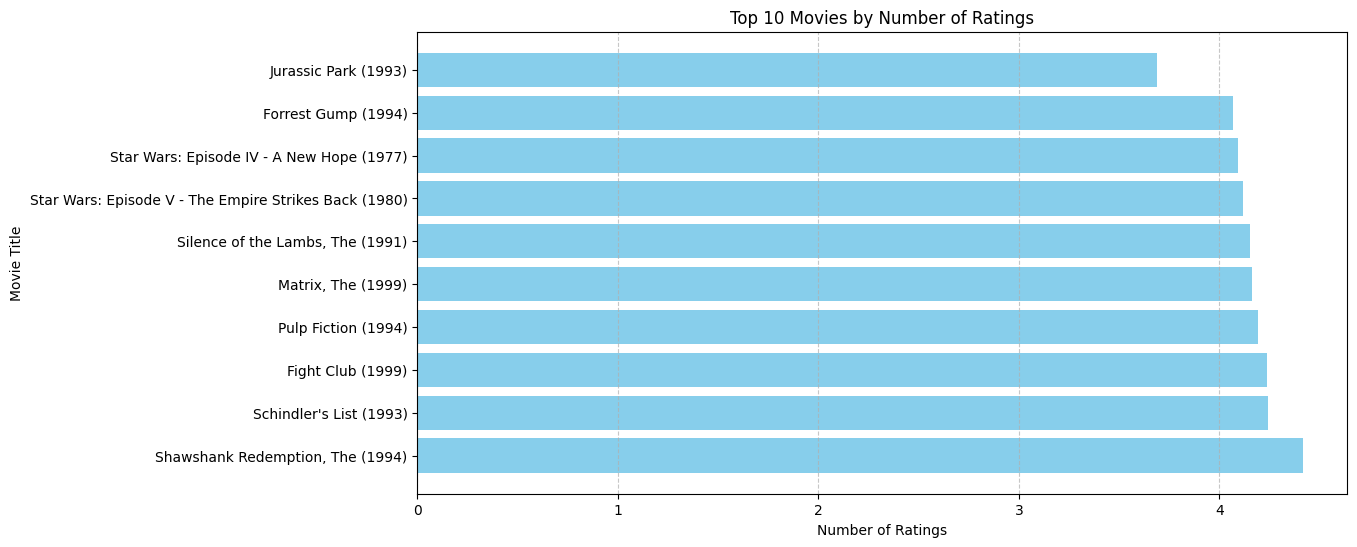

In [91]:


# Skapa en barplot med matplotlib
plt.figure(figsize=(12, 6))
# Chatgpt gave idea with horisontel diagram and showed how
plt.barh(top_10_movies_data_average_titles_sorted["title"], top_10_movies_data_average_titles_sorted["rating"], color="skyblue")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Number of Ratings")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
movies_users = df_ratings.pivot(index="movieId", columns= "userId", values="rating").fillna(0)
mat_movies_users = csr_matrix(movies_users.values)